## Load FATAL data

In [27]:
%run ./FATAL_data_count.ipynb

[ContentFile(path="D2-documentation"), ContentFile(path="DATA"), ContentFile(path="README.md"), ContentFile(path="scripts")]
ContentFile(path="D2-documentation")
ContentFile(path="DATA")
ContentFile(path="README.md")
ContentFile(path="scripts")
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/FATAL_all.csv
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_AGE_14to15_all.csv
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_AGE_16to19_all.csv
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_AGE_20to24_all.csv
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_AGE_25to34_all.csv
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_AGE_35to44_all.csv
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_AGE_45to54_all.csv
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-da

## Select Generic Database to work with

In [28]:
genericDB_files_dict = {}

desired_file_prefix = "NF_GENDER"  # "NF_AGE_14to15_all.csv"

## Create above database dictionary

In [29]:
# pull in the data

# Iterate through all of the URLs
for index in contents:
    url = index.download_url
    
    # Is content_file a file with the .csv extension
    if (desired_file_prefix in url):
        print(url)
        
        name = url.split("/")[-1].split("_all")[0]
        print(name)
        
        # Grab the source contents of the file
        source = urllib.request.urlopen(url).read()
        
        #print(source)
        decoded_data = source.decode("utf-8")
        genericDB_files_dict.setdefault(name, []).append(decoded_data)
        #genericDB.append(decoded_data)   

#print(genericDB_files_dict)

https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_GENDER_F_all.csv
NF_GENDER_F
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_GENDER_M_all.csv
NF_GENDER_M
https://raw.githubusercontent.com/ehsintegration/yfd-phd-bls-data/master/DATA/NF_GENDER_NR_all.csv
NF_GENDER_NR


In [30]:
# Create a dictionary of soc_codes
#
genericDB_dict = {}


# Create Dictionary of SOC codes
#
for db in genericDB_files_dict.keys():
    
    genericDB = genericDB_files_dict[db]
    
    #print(genericDB[0])    
    line = genericDB[0].replace("\"","")
    genericDB_array= line.split("\n")
    #print(genericDB_array[12:])
    
    # Line 12 is where the header stops and the data starts
    #
    for line in genericDB_array[12:]:
        line_array = line.split(",")
        #key  = line_array[0].    [0:7].replace("-","")
        key  = line_array[0][6:12]
        data = line_array[1:]
        #print(line_array)
        #print(key,data)

        # Replace empty values with zero
        if (len(key) > 1):
            #print(key,data[0:8])
            for index in range(0,8):
                if (len(data[index]) == 0):
                    data[index] = '0'
            #print(key,data[0:8])
        
        # Convert to Integers
        if (len(key) > 1):
            #print(key,data[0:8])
            for index in range(0,8):
                data[index] = int(data[index])
            #print(key,data[0:8])   
            
        # Create dictionary entry
        if (len(key) > 1):
            genericDB_dict.setdefault(db+"_"+key, []).append(data[0:8])
    
#index = 0
#for key in genericDB_dict:
#    print(index, key, genericDB_dict[key])
#    index = index + 1

In [31]:
#print(genericDB_dict['NF_GENDER_F_113020'][0])

## Create SOC Level Groups
Create SOC Level Groups for SOC work groups as a dictionary of keys

Level 1 "11XXXX", "12XXXX"....<br>
Level 2 "110XXX", "111XXX", "120XXX"...<br>
Level 3 "1101XX", "1102XX", "1201XX"......<br>

In [32]:
#level1_sockeys = {}
#level2_sockeys = {}
#level3_sockeys = {}

#for key in soc_dict.keys():
#    lev1 = key[0:2]
#    lev2 = key[0:3]
#    lev3 = key[0:6]
#    #print(lev1)
#    level1_sockeys.setdefault(lev1, []).append(key)
#    level2_sockeys.setdefault(lev2, []).append(key)
#    level3_sockeys.setdefault(lev3, []).append(key)
    
##print(level1_sockeys)

## Create a count of DATABASE data for the diferent level soc groups

In [33]:
no_genericDB_data_dict = {}

for index in level1_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            generic_totals = np.array([0,0,0,0,0,0,0,0])
            for key in level1_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
            category = soc_names[str(index)+"0000"]
            #print(db+"\t"+index,category,generic_totals)
        
print("") 

for index in level2_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            generic_totals = np.array([0,0,0,0,0,0,0,0])
            for key in level2_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
            #print(db+"\t"+index,category,generic_totals)
        
print("") 

for index in level3_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            generic_totals = np.array([0,0,0,0,0,0,0,0])
            for key in level3_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
            category = soc_names[str(index)]
            #print(db+"\t"+index,category,generic_totals)
        
print("") 

## SOC code that were not found in the data set

In [34]:
#print(no_genericDB_data_dict.keys())

## Create a RELATIVE count of DATABASE data for the diferent level soc groups



In [35]:
no_genericDB_data_dict = {}

for index in level1_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            fatal_totals = np.array([1,1,1,1,1,1,1,1])
            generic_totals = np.array([1,1,1,1,1,1,1,1])
            for key in level1_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    if new_key in fatalDB_dict.keys():
                        fatal_totals = fatal_totals + np.array(fatalDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
                    
            category = soc_names[str(index)+"0000"]
            relative_totals = fatal_totals / generic_totals
            #print(db+"\t"+index,category,relative_totals)
        
print("") 

for index in level2_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            fatal_totals = np.array([1,1,1,1,1,1,1,1])
            generic_totals = np.array([1,1,1,1,1,1,1,1])
            for key in level2_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    if new_key in fatalDB_dict.keys():
                        fatal_totals = fatal_totals + np.array(fatalDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
                    
            relative_totals = fatal_totals / generic_totals
            #print(db+"\t"+index,relative_totals)
        
print("") 

for index in level3_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            fatal_totals = np.array([1,1,1,1,1,1,1,1])
            generic_totals = np.array([1,1,1,1,1,1,1,1])
            for key in level3_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    if new_key in fatalDB_dict.keys():
                        fatal_totals = fatal_totals + np.array(fatalDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
                    
            category = soc_names[str(index)]
            relative_totals = fatal_totals / generic_totals
            #print(db+"\t"+index,category,relative_totals)
        
print("") 

## Plot level 1 RELATIVE count of DATABASE data for the diferent level soc groups


In [36]:
x = [1,2,3,4,5,6,7,8]

no_genericDB_data_dict = {}

for index in level1_sockeys.keys():
    # running generic_totals for 2011 to 2018   
    for db in genericDB_files_dict.keys(): 
        if (len(index) > 0):
            fatal_totals = np.array([1,1,1,1,1,1,1,1])
            generic_totals = np.array([1,1,1,1,1,1,1,1])
            for key in level1_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    if new_key in fatalDB_dict.keys():
                        fatal_totals = fatal_totals + np.array(fatalDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
                    
            category = soc_names[str(index)+"0000"]
            relative_totals = fatal_totals / generic_totals
            #print(db+" - "+index,category,relative_totals)
            
            #plt.figure(str(db)+"\t"+str(category))
            #plt.plot(x,relative_totals, label=str(category))


## Scatter plot level 1 RELATIVE average count of DATABASE data for soc groups

NF_GENDER_F - 11 ['Management Occupations'] [1.75682086e-05 1.65395875e-05 1.76831533e-05 1.95346838e-05
 1.95844186e-05 1.73910019e-05 1.85973852e-05 1.70732957e-05]
NF_GENDER_F - 13 ['Business and Financial Operations Occupations'] [4.71675864e-05 4.56391767e-05 3.58924662e-05 4.11844652e-05
 5.13584305e-05 5.15437349e-05 4.40121474e-05 5.18914431e-05]
NF_GENDER_F - 15 ['Computer and Mathematical Occupations'] [0.00071891 0.00059844 0.00048054 0.00082576 0.00078064 0.00098912
 0.00090827 0.0005777 ]
NF_GENDER_F - 17 ['Architecture and Engineering Occupations'] [0.00050994 0.00047371 0.00070872 0.00072939 0.00029665 0.00073475
 0.00076278 0.00075131]
NF_GENDER_F - 19 ['Life, Physical, and Social Science Occupations'] [0.00022826 0.00019301 0.00024207 0.00018972 0.00022774 0.00031636
 0.00022619 0.00024325]
NF_GENDER_F - 21 ['Community and Social Service Occupations'] [2.57327398e-05 2.37354917e-05 2.31636979e-05 2.44911954e-05
 2.50808859e-05 2.17386579e-05 2.65104319e-05 2.33421255e-

<IPython.core.display.Javascript object>


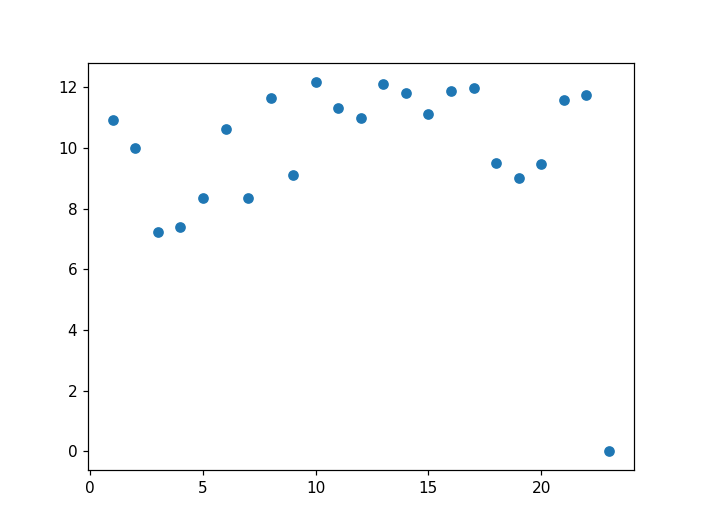

NF_GENDER_M - 11 ['Management Occupations'] [2.15745076e-05 2.46117496e-05 2.06436696e-05 2.22513963e-05
 1.76177305e-05 2.78311208e-05 2.52136860e-05 2.20017161e-05]
NF_GENDER_M - 13 ['Business and Financial Operations Occupations'] [9.36241925e-05 1.05362975e-04 1.16808784e-04 9.45984297e-05
 1.10363095e-04 1.13365832e-04 1.17219552e-04 1.01102012e-04]
NF_GENDER_M - 15 ['Computer and Mathematical Occupations'] [0.00045641 0.00028977 0.00064893 0.00053447 0.00058789 0.0006169
 0.00079302 0.00078678]
NF_GENDER_M - 17 ['Architecture and Engineering Occupations'] [8.22977533e-05 7.83637646e-05 8.07689201e-05 7.03680248e-05
 8.48824378e-05 1.02030405e-04 8.29806655e-05 8.20277254e-05]
NF_GENDER_M - 19 ['Life, Physical, and Social Science Occupations'] [0.00015312 0.00023036 0.00022366 0.00014203 0.00026309 0.00018723
 0.00023918 0.0002702 ]
NF_GENDER_M - 21 ['Community and Social Service Occupations'] [7.20928556e-05 6.36091852e-05 6.86294695e-05 6.05656835e-05
 7.36322804e-05 6.07127679e

<IPython.core.display.Javascript object>


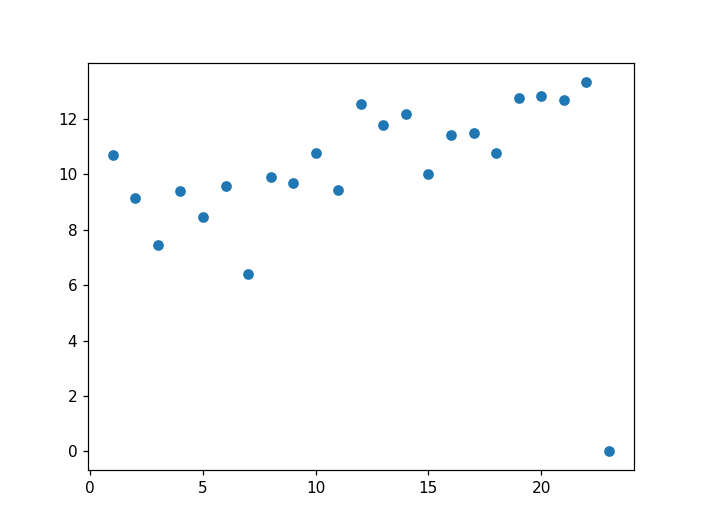

NF_GENDER_NR - 11 ['Management Occupations'] [0.02439024 0.01234568 0.04761905 1.         1.         0.00497512
 1.         0.0070922 ]
NF_GENDER_NR - 13 ['Business and Financial Operations Occupations'] [1.         1.         1.         1.         1.         1.
 1.         0.04761905]
NF_GENDER_NR - 15 ['Computer and Mathematical Occupations'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR - 17 ['Architecture and Engineering Occupations'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR - 19 ['Life, Physical, and Social Science Occupations'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR - 21 ['Community and Social Service Occupations'] [1.         1.         0.02439024 0.02439024 0.00621118 0.02439024
 1.         0.00414938]
NF_GENDER_NR - 23 ['Legal Occupations'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR - 25 ['Educational Instruction and Library Occupations'] [1.         1.         0.00763359 0.01639344 1.         0.03225806
 1.         0.00398406]
NF_GENDER_NR - 27 ['Arts, Design, Entertainment, Sports, and M

<IPython.core.display.Javascript object>


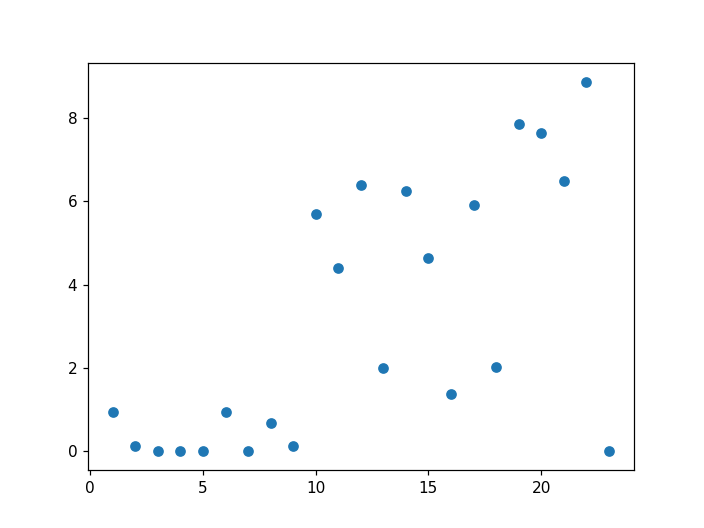

In [37]:

no_genericDB_data_dict = {}

# running generic_totals for 2011 to 2018 
for db in genericDB_files_dict.keys():
    x = []
    y = []
    count = 0 
    for index in level1_sockeys.keys():
        #print(index,db)
        if (len(index) > 0):
            fatal_totals = np.array([1,1,1,1,1,1,1,1])
            generic_totals = np.array([1,1,1,1,1,1,1,1])
            for key in level1_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    if new_key in fatalDB_dict.keys():
                        fatal_totals = fatal_totals + np.array(fatalDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)  
                    
            category = soc_names[str(index)+"0000"]
            relative_totals = fatal_totals / generic_totals
            print(db+" - "+index,category,relative_totals)
            
            count=count+1
            x.append(count)
            y.append(-1*math.log(np.mean(relative_totals)))
            
            
    plt.figure(str(db)+", mean per SOC code level 1")
    plt.plot(x,y,'o')
    plt.show()

## Scatter plot level 6 RELATIVE average count of DATABASE data for soc groups

NF_GENDER_F	110000 ['Management Occupations'] [6.87237991e-05 6.46370629e-05 6.88183883e-05 7.69171602e-05
 7.72141147e-05 6.86766019e-05 7.34160487e-05 6.70196368e-05]
NF_GENDER_F	111000 ['Top Executives'] [0.00051256 0.00035075 0.0005048  0.00060938 0.00081235 0.00040634
 0.00062854 0.00071891]
NF_GENDER_F	111010 ['Chief Executives'] [0.00452489 0.01098901 0.0023753  0.00826446 0.01234568 0.0023753
 0.004329   0.00249377]
NF_GENDER_F	111011 ['Chief Executives'] [0.00452489 0.01098901 0.0023753  0.00826446 0.01234568 0.0023753
 0.004329   0.00249377]
NF_GENDER_F	111020 ['General and Operations Managers'] [0.00058106 0.0003635  0.00064061 0.00065746 0.00087642 0.00049727
 0.00073475 0.00100908]
NF_GENDER_F	111021 ['General and Operations Managers'] [0.00058106 0.0003635  0.00064061 0.00065746 0.00087642 0.00049727
 0.00073475 0.00100908]
NF_GENDER_F	111030 ['Legislators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_F	111031 ['Legislators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_F	112000 ['Adverti

NF_GENDER_F	333012 ['Correctional Officers and Jailers'] [0.00019837 0.00020362 0.00023524 0.00025183 0.00021687 0.000257
 0.00025569 0.00021455]
NF_GENDER_F	333020 ['Detectives and Criminal Investigators'] [0.00826446 0.00662252 0.00990099 0.00662252 0.00900901 0.00900901
 0.00452489 0.00552486]
NF_GENDER_F	333021 ['Detectives and Criminal Investigators'] [0.00826446 0.00662252 0.00990099 0.00662252 0.00900901 0.00900901
 0.00452489 0.00552486]
NF_GENDER_F	333030 ['Fish and Game Wardens'] [1.         1.         0.04761905 1.         0.01408451 1.
 1.         1.        ]
NF_GENDER_F	333031 ['Fish and Game Wardens'] [1.         1.         0.04761905 1.         0.01408451 1.
 1.         1.        ]
NF_GENDER_F	333040 ['Parking Enforcement Workers'] [0.00990099 0.0052356  0.00990099 0.00763359 0.00552486 0.00181488
 0.00452489 0.00900901]
NF_GENDER_F	333041 ['Parking Enforcement Workers'] [0.00990099 0.0052356  0.00990099 0.00763359 0.00552486 0.00181488
 0.00452489 0.00900901]
NF_GENDER_

NF_GENDER_F	519150 ['Photographic Process Workers and Processing Machine Operators'] [0.00221729 0.00383142 0.00232019 0.00243309 0.00763359 0.01639344
 0.00990099 0.01639344]
NF_GENDER_F	519151 ['Photographic Process Workers and Processing Machine Operators'] [0.00221729 0.00383142 0.00232019 0.00243309 0.00763359 0.01639344
 0.00990099 0.01639344]
NF_GENDER_F	519160 ['Computer Numerically Controlled Tool Operators and Programmers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_F	519161 ['Computer Numerically Controlled Tool Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_F	519162 ['Computer Numerically Controlled Tool Programmers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_F	519190 ['Miscellaneous Production Workers'] [0.00011989 0.00012514 0.00013678 0.0001499  0.00013734 0.00012968
 0.00012061 0.00012641]
NF_GENDER_F	519191 ['Adhesive Bonding Machine Operators and Tenders'] [0.04761905 0.04761905 0.01960784 0.04761905 0.01234568 0.04761905
 0.01098901 0.04761905]
NF_GENDER_F	519192 ['Cleaning, Was

<IPython.core.display.Javascript object>


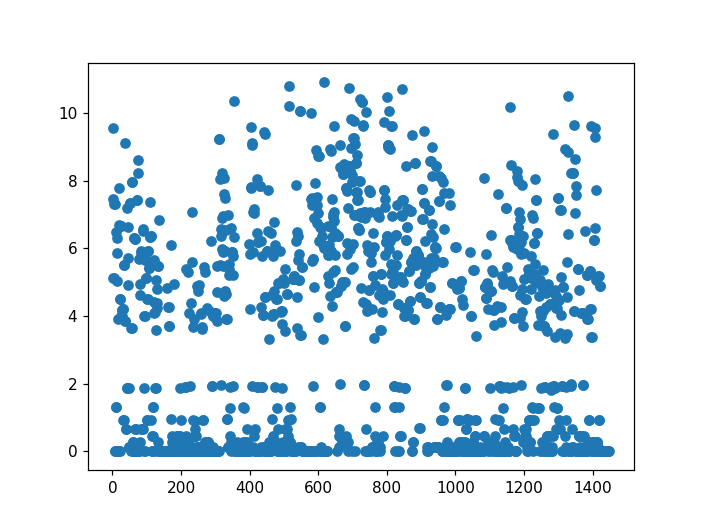

NF_GENDER_M	110000 ['Management Occupations'] [8.53169525e-05 9.70779536e-05 8.18933748e-05 8.79430129e-05
 6.99741096e-05 1.10120031e-04 9.94925878e-05 8.68734254e-05]
NF_GENDER_M	111000 ['Top Executives'] [0.00046926 0.00040634 0.00032669 0.00055525 0.00040469 0.00064061
 0.00043085 0.00045434]
NF_GENDER_M	111010 ['Chief Executives'] [0.002849   0.00134953 0.00158479 0.0052356  0.00552486 0.00302115
 0.00124844 0.00133156]
NF_GENDER_M	111011 ['Chief Executives'] [0.002849   0.00134953 0.00158479 0.0052356  0.00552486 0.00302115
 0.00124844 0.00133156]
NF_GENDER_M	111020 ['General and Operations Managers'] [0.00056148 0.00058106 0.00041135 0.00062073 0.0004384  0.00081235
 0.00065746 0.00068918]
NF_GENDER_M	111021 ['General and Operations Managers'] [0.00056148 0.00058106 0.00041135 0.00062073 0.0004384  0.00081235
 0.00065746 0.00068918]
NF_GENDER_M	111030 ['Legislators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_M	111031 ['Legislators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_M	112000 ['Adver

 0.00497512 0.00255754]
NF_GENDER_M	272091 ['Disc Jockeys, Except Radio'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_M	272099 ['Entertainers and Performers, Sports and Related Workers, All Other'] [0.00473934 0.00900901 0.00343643 0.002849   0.00584795 0.00383142
 0.00497512 0.00255754]
NF_GENDER_M	273000 ['Media and Communication Workers'] [0.004329   0.00584795 0.00900901 0.00662252 0.00763359 0.00621118
 0.0052356  0.00473934]
NF_GENDER_M	273010 ['Broadcast Announcers and Radio Disc Jockeys'] [0.03225806 0.03225806 1.         0.04761905 1.         1.
 1.         1.        ]
NF_GENDER_M	273011 ['Broadcast Announcers and Radio Disc Jockeys'] [0.03225806 0.03225806 1.         0.04761905 1.         1.
 1.         1.        ]
NF_GENDER_M	273020 ['News Analysts, Reporters and Journalists'] [0.01960784 0.02439024 0.01639344 0.03225806 0.01234568 0.00900901
 0.01960784 0.04761905]
NF_GENDER_M	273023 ['News Analysts, Reporters, and Journalists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_M	273030 ['Public

 0.004329   0.004329  ]
NF_GENDER_M	352020 ['Food Preparation Workers'] [0.00018212 0.00019044 0.00015896 0.00018515 0.00018345 0.00019339
 0.00020872 0.00017388]
NF_GENDER_M	352021 ['Food Preparation Workers'] [0.00018212 0.00019044 0.00015896 0.00018515 0.00018345 0.00019339
 0.00020872 0.00017388]
NF_GENDER_M	353000 ['Food and Beverage Serving Workers'] [0.00014879 0.00013984 0.00016075 0.00014704 0.00012935 0.00014857
 0.00014263 0.00012314]
NF_GENDER_M	353010 ['Bartenders'] [0.00142653 0.00118906 0.00156006 0.00134953 0.000999   0.00109769
 0.00105152 0.00136799]
NF_GENDER_M	353011 ['Bartenders'] [0.00142653 0.00118906 0.00156006 0.00134953 0.000999   0.00109769
 0.00105152 0.00136799]
NF_GENDER_M	353020 ['Fast Food and Counter Workers'] [0.00028401 0.00025056 0.00030855 0.00028563 0.00024564 0.00030386
 0.00028161 0.00019681]
NF_GENDER_M	353023 ['Fast Food and Counter Workers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_M	353030 ['Waiters and Waitresses'] [0.00067069 0.00067069 0.000628

NF_GENDER_M	499091 ['Coin, Vending, and Amusement Machine Servicers and Repairers'] [0.00262467 0.00355872 0.002849   0.00398406 0.00369004 0.00621118
 0.0023753  0.00398406]
NF_GENDER_M	499092 ['Commercial Divers'] [0.00763359 0.01960784 0.01960784 1.         0.04761905 1.
 0.00763359 0.02439024]
NF_GENDER_M	499094 ['Locksmiths and Safe Repairers'] [0.00900901 0.01098901 0.00452489 0.0052356  0.00473934 0.00826446
 0.00900901 0.00662252]
NF_GENDER_M	499095 ['Manufactured Building and Mobile Home Installers'] [0.01960784 0.01960784 1.         1.         0.04761905 1.
 0.03225806 0.03225806]
NF_GENDER_M	499096 ['Riggers'] [0.00311526 0.00414938 0.00473934 0.00414938 0.00662252 0.00621118
 0.00452489 0.00497512]
NF_GENDER_M	499097 ['Signal and Track Switch Repairers'] [1.         0.04761905 1.         0.01639344 1.         1.
 1.         1.        ]
NF_GENDER_M	499098 ['HelpersInstallation, Maintenance, and Repair Workers'] [0.00071378 0.00098912 0.00072939 0.00041999 0.00064475 0.000989

NF_GENDER_M	531042 ['FirstLine Supervisors of Helpers, Laborers, and Material Movers, Hand'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_M	531043 ['FirstLine Supervisors of MaterialMoving Machine and Vehicle Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_M	531044 ['FirstLine Supervisors of Passenger Attendants'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_M	531049 ['FirstLine Supervisors of Transportation Workers, All Other'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_M	532000 ['Air Transportation Workers'] [0.00083963 0.0004852  0.00059844 0.00049975 0.00083963 0.00096061
 0.00090827 0.00089206]
NF_GENDER_M	532010 ['Aircraft Pilots and Flight Engineers'] [0.00129702 0.00092507 0.000999   0.00149031 0.00199601 0.0023753
 0.00181488 0.00232019]
NF_GENDER_M	532011 ['Airline Pilots, Copilots, and Flight Engineers'] [0.00156006 0.00109769 0.00175131 0.00226757 0.00277008 0.004329
 0.00226757 0.00369004]
NF_GENDER_M	532012 ['Commercial Pilots'] [0.00763359 0.00621118 0.0023753  0.00414938 0.0070922  0.00552486
 

<IPython.core.display.Javascript object>


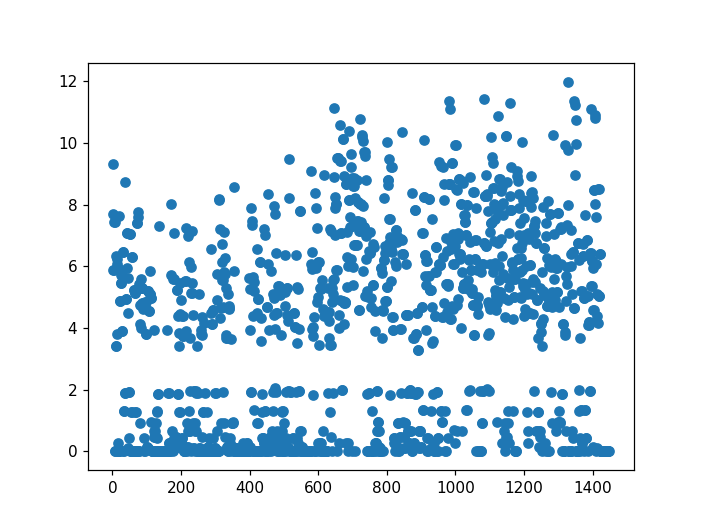

NF_GENDER_NR	110000 ['Management Occupations'] [0.04761905 0.02439024 0.04761905 1.         1.         0.01639344
 1.         0.01408451]
NF_GENDER_NR	111000 ['Top Executives'] [1.         0.02439024 1.         1.         1.         0.02439024
 1.         1.        ]
NF_GENDER_NR	111010 ['Chief Executives'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	111011 ['Chief Executives'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	111020 ['General and Operations Managers'] [1.         1.         1.         1.         1.         0.02439024
 1.         1.        ]
NF_GENDER_NR	111021 ['General and Operations Managers'] [1.         1.         1.         1.         1.         0.02439024
 1.         1.        ]
NF_GENDER_NR	111030 ['Legislators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	111031 ['Legislators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	112000 ['Advertising, Marketing, Promotions, Public Relations, and Sales Managers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	112010 ['Advertising and Promotions Managers

NF_GENDER_NR	211014 ['Mental Health Counselors'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	211015 ['Rehabilitation Counselors'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	211019 ['Counselors, All Other'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	211020 ['Social Workers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	211021 ['Child, Family, and School Social Workers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	211022 ['Healthcare Social Workers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	211023 ['Mental Health and Substance Abuse Social Workers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	211029 ['Social Workers, All Other'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	211090 ['Miscellaneous Community and Social Service Specialists'] [1.         1.         1.         1.         0.03225806 1.
 1.         0.01960784]
NF_GENDER_NR	211091 ['Health Education Specialists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	211092 ['Probation Officers and Correctional Treatment Specialists'] [1.         1.         1.         1.         0.

NF_GENDER_NR	291080 ['Podiatrists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	291081 ['Podiatrists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	291120 ['Therapists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	291122 ['Occupational Therapists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	291123 ['Physical Therapists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	291124 ['Radiation Therapists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	291125 ['Recreational Therapists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	291126 ['Respiratory Therapists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	291127 ['SpeechLanguage Pathologists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	291128 ['Exercise Physiologists'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	291129 ['Therapists, All Other'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	291130 ['Veterinarians'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	291131 ['Veterinarians'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	291140 ['Registered Nurses'] [0.03225806 0.04761905 0.02439024 0.02439024 0.03225806 0.02

 1.         0.02439024]
NF_GENDER_NR	352015 ['Cooks, Short Order'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	352019 ['Cooks, All Other'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	352020 ['Food Preparation Workers'] [1.         1.         1.         1.         1.         0.00763359
 1.         0.01098901]
NF_GENDER_NR	352021 ['Food Preparation Workers'] [1.         1.         1.         1.         1.         0.00763359
 1.         0.01098901]
NF_GENDER_NR	353000 ['Food and Beverage Serving Workers'] [1.         1.         1.         1.         0.00826446 0.01098901
 1.         0.00621118]
NF_GENDER_NR	353010 ['Bartenders'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	353011 ['Bartenders'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	353020 ['Fast Food and Counter Workers'] [1.         1.         1.         1.         1.         0.04761905
 1.         0.00662252]
NF_GENDER_NR	353023 ['Fast Food and Counter Workers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	353030 ['Waiters and Waitresses'] [1.         1.   

NF_GENDER_NR	472231 ['Solar Photovoltaic Installers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	473000 ['Helpers, Construction Trades'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	473010 ['Helpers, Construction Trades'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	473011 ['HelpersBrickmasons, Blockmasons, Stonemasons, and Tile and Marble Setters'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	473012 ['HelpersCarpenters'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	473013 ['HelpersElectricians'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	473014 ['HelpersPainters, Paperhangers, Plasterers, and Stucco Masons'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	473015 ['HelpersPipelayers, Plumbers, Pipefitters, and Steamfitters'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	473016 ['HelpersRoofers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	473019 ['Helpers, Construction Trades, All Other'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	474000 ['Other Construction and Related Workers'] [0.00497512 0.0052356  0.00497512 0.0052356  0.00452489 0.0041

NF_GENDER_NR	518000 ['Plant and System Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	518010 ['Power Plant Operators, Distributors, and Dispatchers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	518011 ['Nuclear Power Reactor Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	518012 ['Power Distributors and Dispatchers'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	518013 ['Power Plant Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	518020 ['Stationary Engineers and Boiler Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	518021 ['Stationary Engineers and Boiler Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	518030 ['Water and Wastewater Treatment Plant and System Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	518031 ['Water and Wastewater Treatment Plant and System Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	518090 ['Miscellaneous Plant and System Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_GENDER_NR	518091 ['Chemical Plant and System Operators'] [1. 1. 1. 1. 1. 1. 1. 1.]
NF_G

<IPython.core.display.Javascript object>


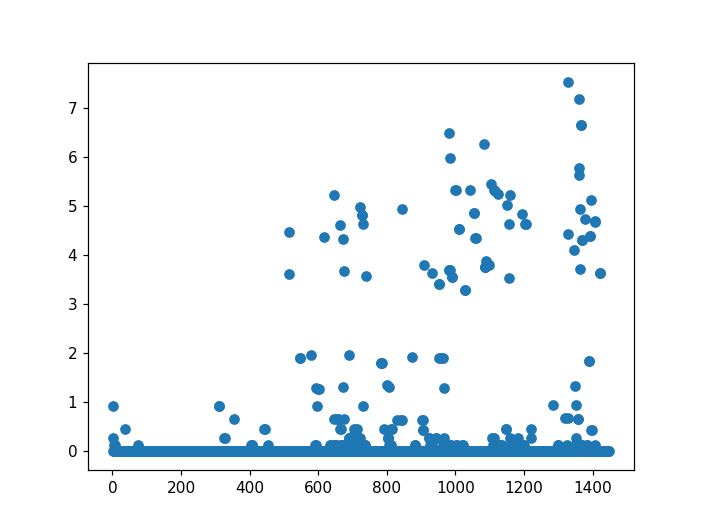

In [38]:

no_genericDB_data_dict = {}

# running generic_totals for 2011 to 2018
for db in genericDB_files_dict.keys():
    x = []
    y = []
    count = 0 
    for index in level3_sockeys.keys():
        if (len(index) > 0):
            fatal_totals = np.array([1,1,1,1,1,1,1,1])
            generic_totals = np.array([1,1,1,1,1,1,1,1])
            for key in level3_sockeys[index]:
                new_key = db+"_"+key
                if new_key in genericDB_dict.keys():
                    #print(genericDB_dict[key][0])
                    if new_key in fatalDB_dict.keys():
                        fatal_totals = fatal_totals + np.array(fatalDB_dict[key][0])
                    generic_totals = generic_totals + np.array(genericDB_dict[new_key][0])
                    #print(key,genericDB_dict[key])
                else:
                    no_genericDB_data_dict.setdefault(key, []).append(0)
                    #print("No genericDB data for ", key)
                    
            category = soc_names[str(index)]
            relative_totals = fatal_totals / generic_totals
            print(db+"\t"+index,category,relative_totals)    
            
            count=count+1
            x.append(count)
            y.append(-1*math.log(np.mean(relative_totals)))
            
            
    plt.figure(str(db) + ", mean per SOC code level 6")
    plt.plot(x,y,'o')
    plt.show()

In [24]:
#print(genericDB_files_dict.keys())